In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course\Practise projects\Lesson 6-Supervised Learning-Classification')

In [7]:
loan=pd.read_csv('loan_borowwer_data.csv')

In [4]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
z=['purpose']
loan=pd.get_dummies(loan,columns=z)

In [10]:
loan

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


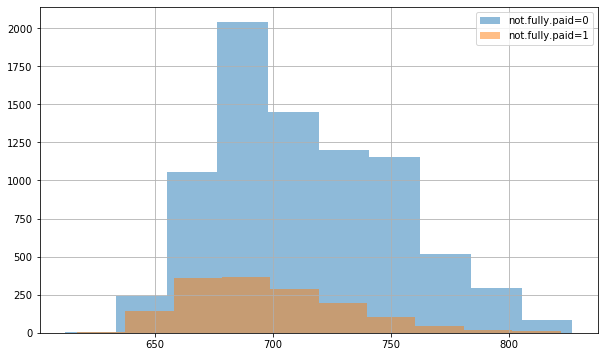

In [23]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==0]['fico'].hist(bins=10,label='not.fully.paid=0',alpha=0.5)
loan[loan['not.fully.paid']==1]['fico'].hist(bins=10,label='not.fully.paid=1',alpha=0.5)
plt.xlabel='fico'
plt.legend()
plt.show()

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_all_other             9578 non-null uint8
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9

In [27]:
x=loan.drop('not.fully.paid',axis=1)
y=loan['not.fully.paid']

In [28]:
x.shape,y.shape

((9578, 19), (9578,))

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6704, 19), (2874, 19), (6704,), (2874,))

In [34]:
#model fitting
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
y_pred_dt=dt.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#accuracy score
print('accuracy score is',accuracy_score(y_pred_dt,y_test))
print('Confusion',confusion_matrix(y_pred_dt,y_test))

accuracy score is 0.7345163535142658
Confusion [[2008  363]
 [ 400  103]]


In [41]:
#random forest 
from sklearn.ensemble import RandomForestClassifier

In [42]:
rd=RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred_rd=rd.predict(x_test)
print('accuracy score is',accuracy_score(y_pred_rd,y_test))
print('Confusion',confusion_matrix(y_pred_rd,y_test))

accuracy score is 0.8333333333333334
Confusion [[2386  457]
 [  22    9]]
